# Table of Contents

### Notebook Prep
### a. Bar Chart
### b. Histogram
### c. Scatterplot
### d. Line Chart

## Task
### 3. Histogram of Hour of Day
### 4. Bar Chart of Loyalty
### 5. Difference in Expenditure by Hour of Day
### 6. Connection Between Age and Dependants
### 7. Connection Between Age and Income

# Notebook Prep

In [1]:
#Import libraries

import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import scipy

In [2]:
#Define 'path'

path = r'C:\Users\PC Planet\Desktop\Self-Education\Data Immersion\Achievement 4\Instacart Basket Analysis'

In [3]:
#Import dataframe

opc = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_all.pkl'))

### a. Bar Chart

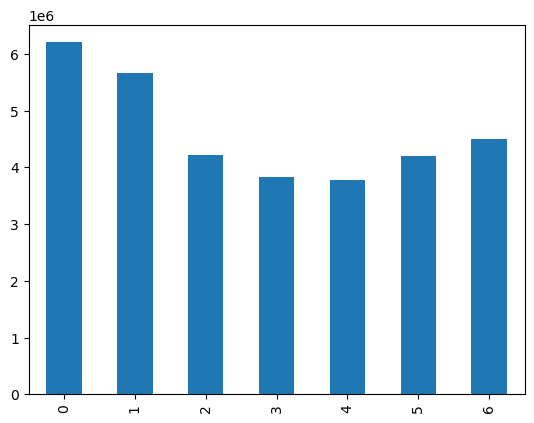

In [5]:
#Create a bar chart

bar = opc['orders_day_of_week'].value_counts().sort_index().plot.bar()

In [7]:
#Export bar chart

bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_orders_dow.png'))

### b. Histogram

In [8]:
#Clean dirty data

opc.loc[opc['prices'] > 100, 'prices'] = np.nan

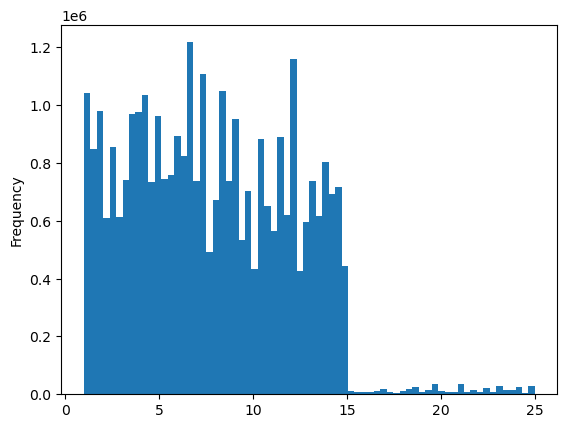

In [9]:
#Create a histogram

hist = opc['prices'].plot.hist(bins=70)

In [11]:
#Export histogram

hist.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'hist_prices.png'))

### c. Scatterplot

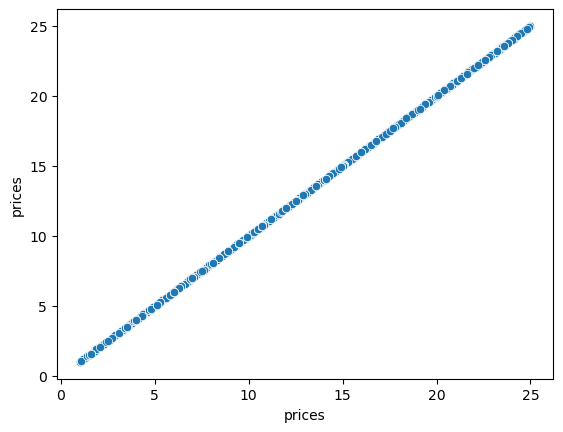

In [12]:
#Create a scatterplot

scatter = sns.scatterplot(x = 'prices', y = 'prices', data = opc)

In [13]:
#Export scatterplot

scatter.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'scatter_prices.png'))

### d. Line Chart

In [4]:
#Create a manageable subset

np.random.seed(4)
dev = np.random.rand(len(opc)) <= 0.7

In [ ]:
#Store 70% sample in dataframe 'big'

big = opc[dev]

In [5]:
#Store 30% sample in dataframe 'small'

small = opc[~dev]

In [6]:
#Create smaller dataframe with only necessary columns

df_2 = small[['orders_day_of_week','prices']]

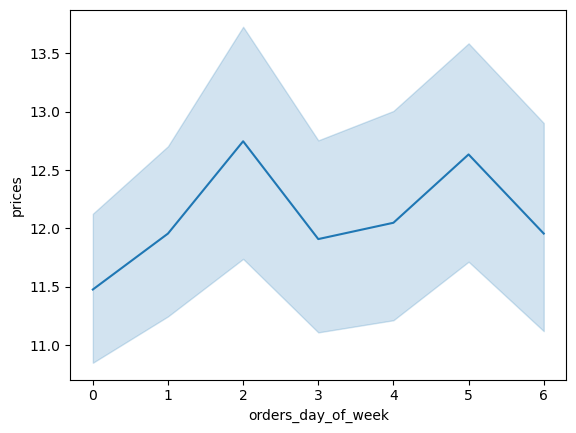

In [7]:
#Create line chart from small dataframe

line = sns.lineplot(data = df_2, x = 'orders_day_of_week', y = 'prices')

In [8]:
#Export line chart

line.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_orders_prices.png'))

### 3. Histogram of Hour of Day

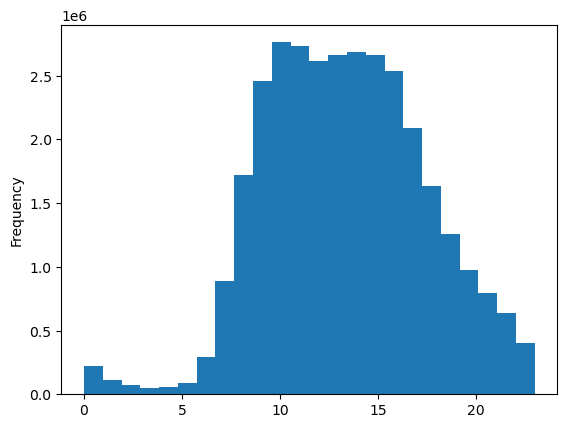

In [9]:
#Create histogram of 'order_hour_of_day'

ohod = opc['order_hour_of_day'].plot.hist(bins = 24)

This histogram demonstrates the hours of the day that most items are purchased. I had to word that very carefully, though, because it doesn't necessarily show the busiest hours. We can't say that because the dataframe is given a different entry per ITEM purchased, not per ORDER. There may be, however unlikely, a group of customers who order at a less busy time of day, but purchase more items than those who purchase later. For most purposes, though, this histogram should suffice to extrapolate a similar meaning.

In [14]:
#Export histogram

ohod.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'hist_order_hours.png'))

### 4. Bar Chart of Loyalty

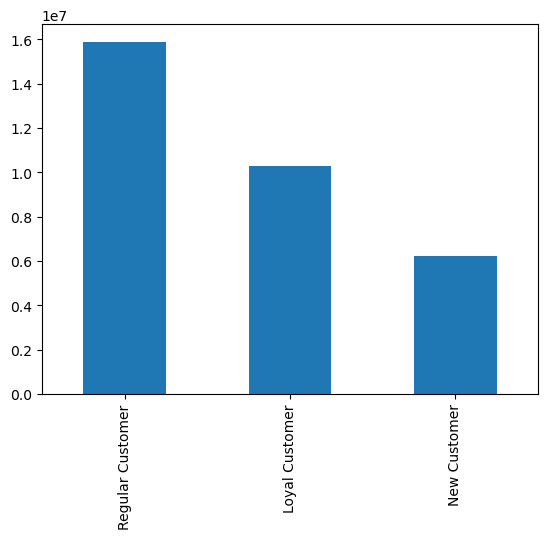

In [13]:
#Create a bar chart from the Loyalty Flag

loyalty = opc['loyalty_flag'].value_counts().plot.bar()

In [15]:
#Export bar chart

loyalty.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_loyalty.png'))

### 5. Difference in Expenditure by Hour of Day

In [19]:
#Define new dataframe based on subset 'small'

df = small[['prices', 'order_hour_of_day']]

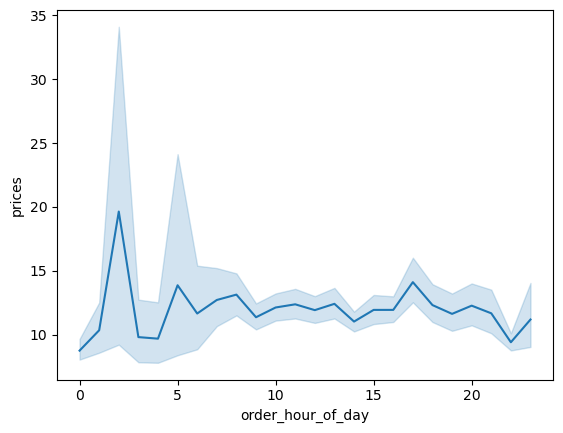

In [20]:
#Create line chart

pricehour = sns.lineplot(data = df, x = 'order_hour_of_day', y = 'prices')

In [21]:
#Export chart

pricehour.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_price_hour.png'))

### 6. Connection Between Age and Dependants

In [23]:
#Create dataframe with only relevant columns

aged = small[['age', 'dependants']]

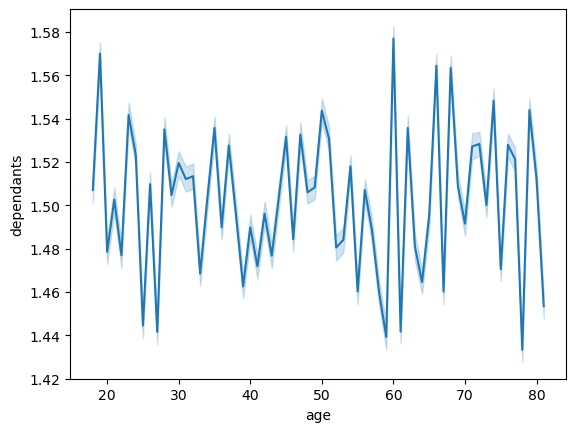

In [24]:
#Create line chart

agedplot = sns.lineplot(data = aged, x = 'age', y = 'dependants')

This chart shows, at least with cursory analysis, that there is not a strong connection between age and number of dependants. Generally speaking, it seems to be a near uniform trend of 1.5--1 or 2 dependants are equally reasonable for assumptions.

In [25]:
#Export chart

agedplot.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_age_dependants.png'))

### 7. Connection Between Age and Income

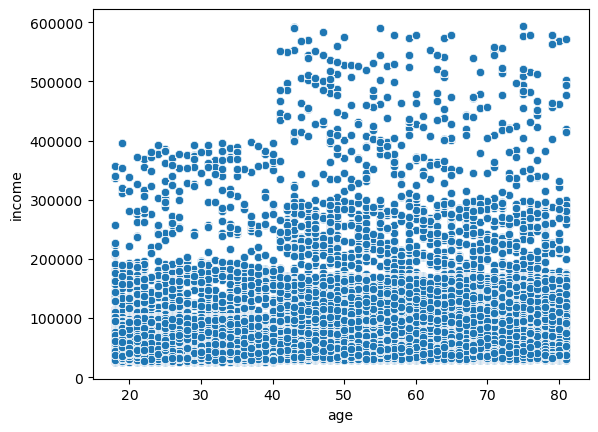

In [27]:
#Create scatterplot

age_spending = sns.scatterplot(x = 'age', y = 'income', data = opc)

The scatterplot shows that maximum income jumps drastically, around $/200,000 difference, around age 40. It also shows the largest clusters are below the $200,000 mark. There is a moderate cluster between $/200,000 and $/300,000, but only starting around age 40, as well.

In [28]:
#Export chart

age_spending.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'scatter_age_income.png'))